# Tomimatsu-Sato solutions describe cosmic strings interacting with gravitational waves Xanthopoulos
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 22, 2022

Here we concentrate on metric 2.1

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.41.2512

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,omega,phi,z,dt,domega,dphi,dz = symbols('t omega phi z dt domega dphi dz')

In [4]:
nu = Function('nu')(t,omega)
nu

In [5]:
chi = Function('chi')(t,omega)
chi

In [9]:
q_2 = Function('q_2')(t,omega)
q_2

In [10]:
variables = Matrix([t,omega,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ω⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [11]:
differentials = Matrix([dt,domega,dphi,dz])
differentials 

⎡  dt  ⎤
⎢      ⎥
⎢domega⎥
⎢      ⎥
⎢ dphi ⎥
⎢      ⎥
⎣  dz  ⎦

In [12]:
lineElement = expand( exp(2*nu)*(dt**2 -domega**2) - omega * ( chi*dphi**2 + chi**-1 * (dz - q_2 * dphi)**2) ) 
lineElement

In [13]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅ν(t, ω)                                                   ⎤
⎢ℯ                0                  0                  0     ⎥
⎢                                                             ⎥
⎢              2⋅ν(t, ω)                                      ⎥
⎢    0       -ℯ                      0                  0     ⎥
⎢                                                             ⎥
⎢                                          2                  ⎥
⎢                                      ω⋅q₂ (t, ω)  ω⋅q₂(t, ω)⎥
⎢    0            0       -ω⋅χ(t, ω) - ───────────  ──────────⎥
⎢                                        χ(t, ω)     χ(t, ω)  ⎥
⎢                                                             ⎥
⎢                                ω⋅q₂(t, ω)            -ω     ⎥
⎢    0            0              ──────────          ───────  ⎥
⎣                                 χ(t, ω)            χ(t, ω)  ⎦

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡ 2⋅ν(t, ω)                                                   ⎤
⎢ℯ                0                  0                  0     ⎥
⎢                                                             ⎥
⎢              2⋅ν(t, ω)                                      ⎥
⎢    0       -ℯ                      0                  0     ⎥
⎢                                                             ⎥
⎢                                          2                  ⎥
⎢                                      ω⋅q₂ (t, ω)  ω⋅q₂(t, ω)⎥
⎢    0            0       -ω⋅χ(t, ω) - ───────────  ──────────⎥
⎢                                        χ(t, ω)     χ(t, ω)  ⎥
⎢                                                             ⎥
⎢                                ω⋅q₂(t, ω)            -ω     ⎥
⎢    0            0              ──────────          ───────  ⎥
⎣                                 χ(t, ω)            χ(t, ω)  ⎦

In [16]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("t omega phi z")
t,omega,phi,z = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂            ∂                                                                            
⎢⎢──(ν(t, ω))  ──(ν(t, ω))                                                0                 
⎢⎢∂t           ∂ω                                                                           
⎢⎢                                                                                          
⎢⎢∂            ∂                                                                            
⎢⎢──(ν(t, ω))  ──(ν(t, ω))                                                0                 
⎢⎢∂ω           ∂t                                                                           
⎢⎢                                                                    

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                        ⎛∂ 
⎢                                             2                 2                      ω⋅⎜──
⎢                                ⎛∂          ⎞    ⎛∂           ⎞    ∂                    ⎝∂ω
⎢    2              2            ⎜──(χ(t, ω))⎟    ⎜──(q₂(t, ω))⎟    ──(ν(t, ω))      - ─────
⎢   ∂              ∂             ⎝∂t         ⎠    ⎝∂t          ⎠    ∂ω                      
⎢  ───(ν(t, ω)) - ───(ν(t, ω)) - ────────────── - ─────────────── + ───────────      ───────
⎢    2              2                 2                 2                ω                  
⎢  ∂ω             ∂t               2⋅χ (t, ω)        2⋅χ (t, ω)                             
⎢                                                                                           
⎢    ⎛∂           ∂             ∂            ∂           ⎞                                  
⎢  ω⋅⎜──(χ(t, ω))⋅──(χ(t, ω)) + ──(q₂(t, ω))⋅──(q₂(t, ω))⎟            

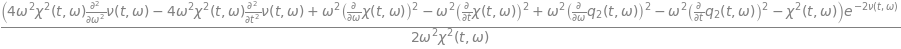

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                    ⎛      
⎢                                           2                 2                      ⎜   2  
⎢                              ⎛∂          ⎞    ⎛∂           ⎞    ∂             0.25⋅⎜4⋅ω ⋅χ
⎢  2              2            ⎜──(χ(t, ω))⎟    ⎜──(q₂(t, ω))⎟    ──(ν(t, ω))        ⎜      
⎢ ∂              ∂             ⎝∂t         ⎠    ⎝∂t          ⎠    ∂ω                 ⎝      
⎢───(ν(t, ω)) - ───(ν(t, ω)) - ────────────── - ─────────────── + ─────────── - ────────────
⎢  2              2                 2                 2                ω                    
⎢∂ω             ∂t               2⋅χ (t, ω)        2⋅χ (t, ω)                               
⎢                                                                                           
⎢                                                                                 ⎛∂        
⎢                                                                     

In [23]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [24]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [25]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                        ⎛∂ 
⎢                                             2                 2                      ω⋅⎜──
⎢                                ⎛∂          ⎞    ⎛∂           ⎞    ∂                    ⎝∂ω
⎢    2              2            ⎜──(χ(t, ω))⎟    ⎜──(q₂(t, ω))⎟    ──(ν(t, ω))      - ─────
⎢   ∂              ∂             ⎝∂t         ⎠    ⎝∂t          ⎠    ∂ω                      
⎢  ───(ν(t, ω)) - ───(ν(t, ω)) - ────────────── - ─────────────── + ───────────      ───────
⎢    2              2                 2                 2                ω                  
⎢  ∂ω             ∂t               2⋅χ (t, ω)        2⋅χ (t, ω)                             
⎢                                                                                           
⎢    ⎛∂           ∂             ∂            ∂           ⎞                                  
⎢  ω⋅⎜──(χ(t, ω))⋅──(χ(t, ω)) + ──(q₂(t, ω))⋅──(q₂(t, ω))⎟            

In [26]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                    2                     2                      2                      2  
⎢       ⎛∂          ⎞         ⎛∂          ⎞         ⎛∂           ⎞         ⎛∂           ⎞   
⎢  0.25⋅⎜──(χ(t, ω))⎟    0.25⋅⎜──(χ(t, ω))⎟    0.25⋅⎜──(q₂(t, ω))⎟    0.25⋅⎜──(q₂(t, ω))⎟   
⎢       ⎝∂ω         ⎠         ⎝∂t         ⎠         ⎝∂ω          ⎠         ⎝∂t          ⎠   
⎢- ─────────────────── - ─────────────────── - ──────────────────── - ──────────────────── +
⎢         2                     2                     2                      2              
⎢        χ (t, ω)              χ (t, ω)              χ (t, ω)               χ (t, ω)        
⎢                                                                                           
⎢                     ⎛∂           ∂             ∂            ∂           ⎞                 
⎢                   ω⋅⎜──(χ(t, ω))⋅──(χ(t, ω)) + ──(q₂(t, ω))⋅──(q₂(t,

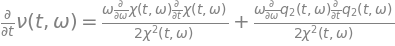

In [50]:
dnudt = Eq(diff(nu,t), expand( solve( einsteinSimplified[1,0], diff(nu,t) )[0] ) ) 
dnudt

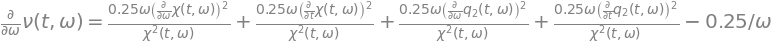

In [51]:
dnudomega = Eq(diff(nu,omega) , expand( solve( einsteinSimplified[1,1], diff(nu,omega) )[0] ) )
dnudomega

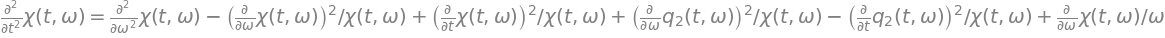

In [52]:
d2chidt2 = Eq(diff(chi,t,t), expand( solve( ricciSimplified[3,3].args[2], diff(chi,t,t) )[0] ) )
d2chidt2

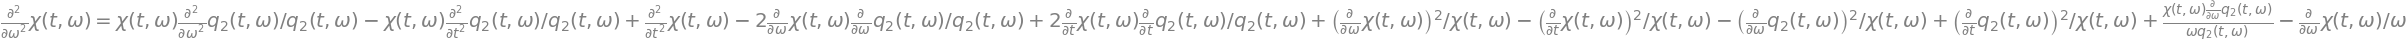

In [46]:
d2chidomega2 = Eq(diff(chi,omega,omega) , solve( ricciSimplified[2,3].args[2], diff(chi,omega,omega) )[0] ) 
d2chidomega2

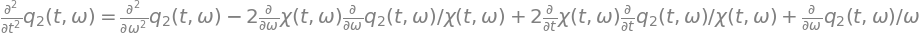

In [53]:
d2q2dt2 = Eq( diff(q_2,t,t) , solve( ricciSimplified[2,2].args[2].subs(d2chidomega2.lhs,d2chidomega2.rhs), diff(q_2,t,t) )[0] )
d2q2dt2

In [55]:
vacuumFieldEquations = Matrix([d2chidt2,d2q2dt2,dnudt,dnudomega])
vacuumFieldEquations

⎡                                             2                2                 2          
⎢                                ⎛∂          ⎞    ⎛∂          ⎞    ⎛∂           ⎞    ⎛∂     
⎢    2              2            ⎜──(χ(t, ω))⎟    ⎜──(χ(t, ω))⎟    ⎜──(q₂(t, ω))⎟    ⎜──(q₂(
⎢   ∂              ∂             ⎝∂ω         ⎠    ⎝∂t         ⎠    ⎝∂ω          ⎠    ⎝∂t    
⎢  ───(χ(t, ω)) = ───(χ(t, ω)) - ────────────── + ────────────── + ─────────────── - ───────
⎢    2              2               χ(t, ω)          χ(t, ω)           χ(t, ω)           χ(t
⎢  ∂t             ∂ω                                                                        
⎢                                                                                           
⎢                                         ∂           ∂                ∂           ∂        
⎢         2               2             2⋅──(χ(t, ω))⋅──(q₂(t, ω))   2⋅──(χ(t, ω))⋅──(q₂(t, 
⎢        ∂               ∂                ∂ω          ∂ω              